In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [12]:
data =pd.read_csv('/content/drive/MyDrive/python/data/cardio_train.csv',sep=";")
# load the data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#결측치 확인
data.isnull().sum()

#이상치 제거
#age
age_mean = data['age'].mean()
age_std = data['age'].std()
indexNames = data[data['age'] < age_mean - 3*age_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['age'] > age_mean + 3*age_std].index
data.drop(indexNames , inplace=True)
print('age:',data.shape)
#gender
gen_mean = data['gender'].mean()
gen_std = data['gender'].std()
indexNames = data[data['gender'] < gen_mean - 3*gen_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gender'] > gen_mean + 3*gen_std].index
data.drop(indexNames , inplace=True)
print('gender:',data.shape)
#height
height_mean = data['height'].mean()
height_std = data['height'].std()
indexNames = data[data['height'] < height_mean - 3*height_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['height'] > height_mean + 3*height_std].index
data.drop(indexNames , inplace=True)
print('height:',data.shape)
#weight
weight_mean = data['weight'].mean()
weight_std = data['weight'].std()
indexNames = data[data['weight'] < weight_mean - 3*weight_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['weight'] > weight_mean + 3*weight_std].index
data.drop(indexNames , inplace=True)
print('weight:',data.shape)
#bp
bp_mean = data['ap_hi'].mean()
bp_std = data['ap_hi'].std()
indexNames = data[data['ap_hi'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_hi'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)

bp_mean = data['ap_lo'].mean()
bp_std = data['ap_lo'].std()
indexNames = data[data['ap_lo'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_lo'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)
print('bp:',data.shape)
#cholesterol
cholesterol_mean = data['cholesterol'].mean()
cholesterol_std = data['cholesterol'].std()
indexNames = data[data['cholesterol'] < cholesterol_mean - 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cholesterol'] > cholesterol_mean + 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
print('cholesterol:',data.shape)
#glucose
gluc_mean = data['gluc'].mean()
gluc_std = data['gluc'].std()
indexNames = data[data['gluc'] < gluc_mean - 3*gluc_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gluc'] > gluc_mean + 3*gluc_std].index
data.drop(indexNames , inplace=True)
print('glucose:',data.shape)
#smoke
smoke_mean = data['smoke'].mean()
smoke_std = data['smoke'].std()
indexNames = data[data['smoke'] < smoke_mean - 3*smoke_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['smoke'] > smoke_mean + 3*smoke_std].index
data.drop(indexNames , inplace=True)
print('smoke:',data.shape)
#alcohol
alco_mean = data['alco'].mean()
alco_std = data['alco'].std()
indexNames = data[data['alco'] < alco_mean - 3*alco_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['alco'] > alco_mean + 3*alco_std].index
data.drop(indexNames , inplace=True)
print('alcohol:',data.shape)
#activity
active_mean = data['active'].mean()
active_std = data['active'].std()
indexNames = data[data['active'] < active_mean - 3*active_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['active'] > active_mean + 3*active_std].index
data.drop(indexNames , inplace=True)
print('activity:',data.shape)
#cardio
cardio_mean = data['cardio'].mean()
cardio_std = data['cardio'].std()
indexNames = data[data['cardio'] < cardio_mean - 3*cardio_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cardio'] > cardio_mean + 3*cardio_std].index
data.drop(indexNames , inplace=True)
print('cardio:',data.shape)

age: (69996, 13)
gender: (69996, 13)
height: (69703, 13)
weight: (69024, 13)
bp: (68067, 13)
cholesterol: (68067, 13)
glucose: (62937, 13)
smoke: (57373, 13)
alcohol: (55699, 13)
activity: (55699, 13)
cardio: (55699, 13)


In [14]:
#As you can see there are no null values in the data frame. Delete the 'id' feature that does not provide important information.
data=data.drop(['id', 'cholesterol', 'gluc', 'cardio'],axis=1)
#The 'Age' feature counts age by days. Convert it to age by years.
data['age']=data['age']/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active
0,50.391781,2,168,62.0,110,80,0,0,1
1,55.419178,1,156,85.0,140,90,0,0,1
2,51.663014,1,165,64.0,130,70,0,0,0
3,48.282192,2,169,82.0,150,100,0,0,1
4,47.873973,1,156,56.0,100,60,0,0,0


In [15]:
info = data[['age','gender','height','weight','smoke','alco','active']]
bp = data[['ap_hi','ap_lo']]

# creating train and test sets
train_info = info[:50000]
train_bp = bp[:50000]

test_info_bp = info[50000:]
test_bp = bp[50000:]

print(info.shape, bp.shape)
print(train_info.shape, train_bp.shape,test_info_bp.shape, test_bp.shape)

info.to_csv('bp.csv',index=False, header=True)
bp=pd.read_csv('bp.csv')

(55699, 7) (55699, 2)
(50000, 7) (50000, 2) (5699, 7) (5699, 2)


In [16]:

x = tf.keras.layers.Input(shape=[7,])
h = tf.keras.layers.Dense(32, activation='relu')(x)
h = tf.keras.layers.Dense(32, activation='relu')(h)
y = tf.keras.layers.Dense(2)(h)
model = tf.keras.models.Model(x,y)
model.compile(loss='Huber', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(train_info, train_bp, epochs=10, verbose=1)

model.save('bp_predict.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 18.2675 - accuracy: 0.8588
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 9.2725 - accuracy: 0.9964
Epoch 3/10
1563/1563 [============================

In [17]:
test_info_bp = model.predict(test_info_bp)
print(test_info_bp)

[[119.4975   78.61708]
 [121.34807  80.48463]
 [133.85179  86.3882 ]
 ...
 [129.59834  84.05688]
 [127.86809  83.04016]
 [126.28312  83.60549]]


In [18]:
print(test_bp)

       ap_hi  ap_lo
62807    120     80
62808    120     80
62810    130     80
62811    120     80
62812    150     90
...      ...    ...
69992    170     90
69993    130     90
69994    150     80
69998    135     80
69999    120     80

[5699 rows x 2 columns]


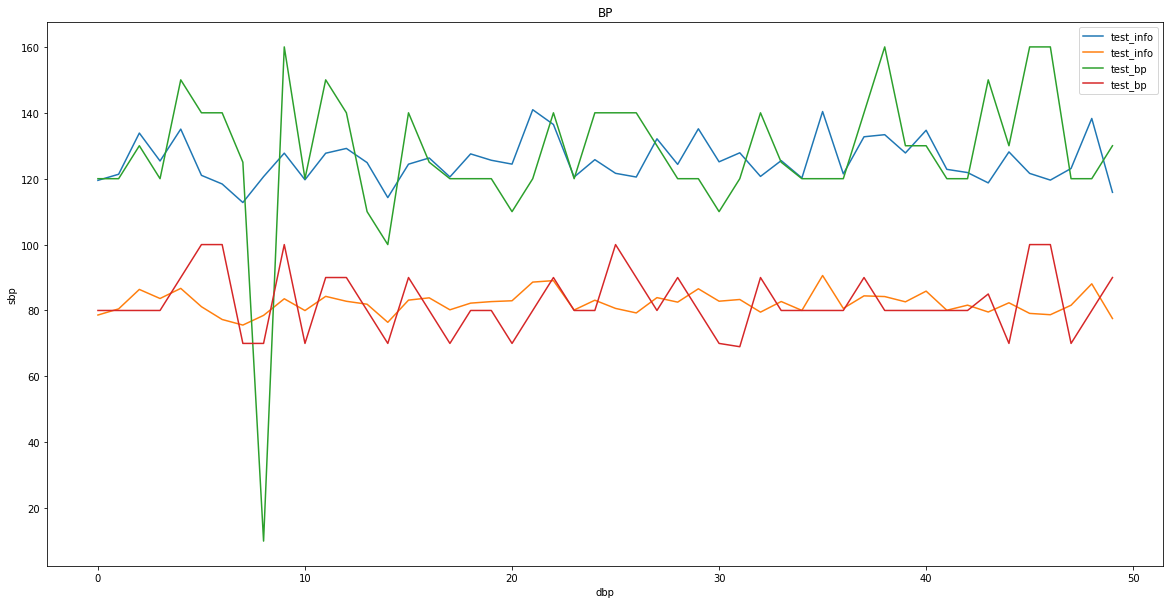

In [19]:
x = test_info_bp
x = x[:50]
x1 = test_bp['ap_hi']
y1 = test_bp['ap_lo']

x1 = x1.tolist()
y1 = y1.tolist()
x1 = x1[:50]
y1 = y1[:50]

plt.figure(figsize=(20,10))
plt.plot(x,label='test_info')
plt.plot(x1,label='test_bp')
plt.plot(y1,label='test_bp')
plt.xlabel('dbp')
plt.ylabel('sbp')
plt.title('BP')
plt.legend()

plt.show()